# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Lecture 3 - Coding Environment Setup and review of `statsmodels`
###  Notebook A

**Harvard University**<br>
**Spring 2021**<br>
**Instructors:** Pavlos Protopapas, Mark Glickman, and Chris Tanner<br>
**Additional Instructor:** Eleni Kaxiras<br><BR>
*Content:* Eleni Kaxiras and Will Claybaugh

---

In [1]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2019-CS109B/master/content/styles/cs109.css").text
HTML(styles)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

## Learning Goals

By the end of this lecture, you should be able to:
* Know how to set up your coding/working environment.
* Understand how to implement various functions in `statsmodels`, e.g. how to use R-like formulas for variable representation.

## 1. Getting class material

### Option 1A: Download directly from Ed 

* Use the >> to download.

### Option 1B: Cloning the class repo and then copying the contents in a different directory so you can make changes.

You may access the code used in class by cloning the class repo: [https://github.com/Harvard-IACS/2021-CS109B](https://github.com/Harvard-IACS/2021-CS109B)

* Open the Terminal in your computer and go to the Directory where you want to clone the repo. Then run 

`git clone https://github.com/Harvard-IACS/2021-CS109B.git`

* If you have already cloned the repo, OR if new material is added (happens every day), go inside the '/2021-CS109B/' directory and run 

`git pull`

* **Caution:** If you change the notebooks and then run `git pull` your changes will be overwritten. So create a `playground` folder and copy the folder with the notebook with which you want to work.

### Option 1C: (use at own risk) Forking the class repo

In order not to lose any changes you have made when updating the content (pulling) from the main repo, a good practice is to `fork` the repo locally. For more on this see Maddy Nakada's notes (make sure you substitute 2019 for 2021!): [How to Fork a Repo](https://canvas.harvard.edu/courses/84598/files?preview=11627118). NOTE: While Fork is a proper way to handle local changes, it doesn't magically solve everything -- if you edit a file that originated from our course repo (e.g., a HW notebook), and later pull from our 'upstream' repo again, any changes you make will require resolving `merge conflict(s)`. Thus, if you want to safetly and easily preserve any of your changes, we recommend renaming your files and/or copying them into an independent directory within your repo.

## 2. Running code:

### Option 2A: Using your local environment 
<BR>
    <div class='exercise'><b>Use Virtual Environments: we cannot stress this enough!</b></div>

Isolating your projects inside specific environments helps you manage dependencies and therefore keep your sanity. You can recover from mess-ups by simply deleting an environment. Sometimes certain installation of libraries conflict with one another. 

The two most popular tools for setting up environments are:

- `conda` (a package and environment manager)
- `pip` (a Python package manager) with `virtualenv` (a tool for creating environments)

We recommend using `conda` package installation and environments. `conda` installs packages from the Anaconda Repository and Anaconda Cloud, whereas `pip` installs packages from PyPI. Even if you are using `conda` as your primary package installer and are inside a `conda` environment, you can still use `pip install` for those rare packages that are not included in the `conda` ecosystem. 

See here for more details on how to manage [Conda Environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

<div class='exercise'> <b> Use the cs109b.yml file to create an environment:</b></div>

``` 
$ conda env create -f cs109b.yml
$ conda activate cs109b
```   
We have included the packages that you will need in the `cs109b.yml` file. 

### Option 2B: Using Cloud Resources
#### Using FAS OnDemand (supported by CS109b)

FAS provides a platform, accessible via the `FAS OnDemand` menu link in **Canvas**. Most of the libraries such as keras, tensorflow, pandas, etc., are pre-installed. If a library is missing you may install it via the Terminal.

**NOTE**: The AWS platform is funded by FAS for the purposes of the class.  You are not allowed to use it for purposes not related to this course. Make sure you stop your instance as soon as you do not need it.

Information on how to use the platform is displayed when you click the link. For more see [Fas OnDemand Guide](https://canvas.harvard.edu/courses/84598/pages/fas-ondemand-guide).

#### Using Google Colab (on your own)

Google's Colab platform [https://colab.research.google.com/](https://colab.research.google.com/) offers a GPU enviromnent to test your ideas, it's fast, free, with the only caveat that your files persist only for 12 hours (last time we checked). The solution is to keep your files in a repository and just clone it each time you use Colab.  

#### Using AWS in the Cloud (on your own)

For those of you who want to have your own machines in the Cloud to run whatever you want, Amazon Web Services is a (paid) solution. For more see: [https://docs.aws.amazon.com/polly/latest/dg/setting-up.html](https://docs.aws.amazon.com/polly/latest/dg/setting-up.html)

Remember, AWS is a paid service, so if you let your machine run for days you will get charged!

## 3. Ensuring everything is installed correctly

### Some of the packages we will need for this class

- **Smoothing**:
 - statsmodels - [https://www.statsmodels.org/](https://www.statsmodels.org/)<br>
 - scipy
 - pyGAM - [https://pygam.readthedocs.io/en/latest/](https://pygam.readthedocs.io/en/latest/)
 - csaps - [https://csaps.readthedocs.io]
    
- **Clustering**:
 - Sklearn - [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
 - scipy - [https://www.scipy.org](https://www.scipy.org)
 - gap_statistic (by Miles Granger) - [https://anaconda.org/milesgranger/gap-statistic/notebook](https://anaconda.org/milesgranger/gap-statistic/notebook)

- **Bayes**:
 - pymc3 - [https://docs.pymc.io](https://docs.pymc.io)
 
- **Neural Networks**:
 - keras - [https://www.tensorflow.org/guide/keras](https://www.tensorflow.org/guide/keras)

<div class='exercise'> <b> Exercise 1:  Run the following cells to make sure these packages load correctly in our environment.</div>

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
digits.target # you should see [0, 1, 2, ..., 8, 9, 8]

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

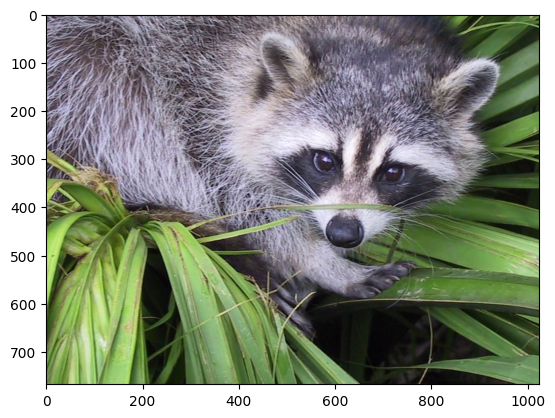

In [3]:
from scipy import datasets
import matplotlib.pyplot as plt


face = datasets.face()
plt.imshow(face)
plt.show() # you should see a racoon

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [6]:
from pygam import PoissonGAM, s, te
from pygam.datasets import chicago
from mpl_toolkits.mplot3d import Axes3D

X, y = chicago(return_X_y=True)

gam = PoissonGAM(s(0, n_splines=200) + te(3, 1) + s(2)).fit(X, y)

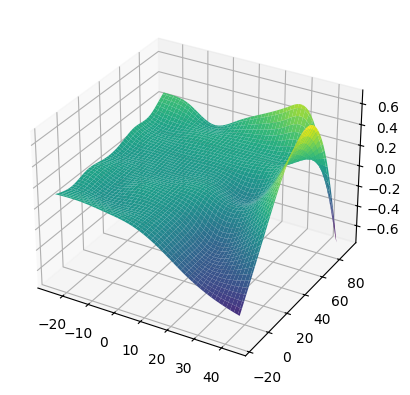

In [7]:
XX = gam.generate_X_grid(term=1, meshgrid=True)
Z = gam.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

In [1]:
import pymc as pm
print('Running PyMC3 v{}'.format(pm.__version__)) # you should see 'Running on PyMC3 v3.8'

Running PyMC3 v5.25.1


In [6]:
# making sure you have gap_statistic
import pyEDAkit

## 4. Plotting 

### `matplotlib` and `seaborn`

- `matplotlib` 
- [seaborn: statistical data visualization](https://seaborn.pydata.org/). `seaborn` works great with `pandas`.  It can also be customized easily.  Here is the basic `seaborn` tutorial: [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html).

#### Plotting a function of 2 variables using contours

In optimization, our objective function will often be a function of two or more variables. While it's hard to visualize a function of more than 3 variables, it's very informative to plot one of 2 variables. To do this we use contours. First we define the $x1$ and $x2$ variables and then construct their pairs using `meshgrid`. 

In [7]:
import seaborn as sn
import numpy as np

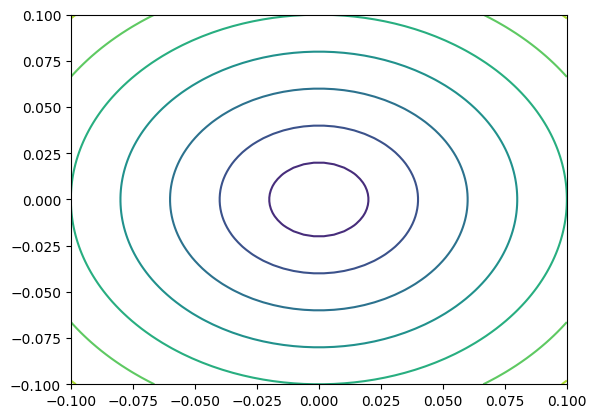

In [ ]:
x1 = np.linspace(-0.1, 0.1, 50)
x2 = np.linspace(-0.1, 0.1, 100)
xx, yy = np.meshgrid(x1, x2)
z = np.sqrt(xx**2+yy**2)
plt.contour(x1,x2,z);

## 5. We will be using `keras` via `tensorflow` 

**[TensorFlow](https://www.tensorflow.org)** is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[Keras](https://keras.io/)**, is a high-level API, created by François Chollet, and used for fast prototyping, advanced research, and production. `tf.keras` is now maintained by Tensorflow.

<div class="exercise"><b>Exercise 2: Run the following cells to make sure you have the basic libraries to do deep learning</b></div>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()  # For easy reset of notebook state.

# You should see a >=2.3.0 here! 
# If you do not, upgrade your env to tensorflow==2.3.0
print(tf.__version__)  
print(tf.keras.__version__)

In [ ]:
# Check if your machine has NVIDIA GPUs. 
hasGPU = tf.config.list_physical_devices()
print(f'My computer has the following devices: {hasGPU}')

My computer has the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]
